<a href="https://colab.research.google.com/github/morateng/BigData_and_DeepLearning/blob/main/MLP_no_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

# 모델 정의

model은 4개의 layer

1st hidden : h1, 256
2nd hidden : h2, 128
출력층: y_hat, 10

파라미터: 3개의 파리미터 그룹
W1, b1: x와 h1을 연결: 28x28 --> 256
W2, b2: h1과 h2를 연결: 256 --> 128
W3, b3: h2와 y_hat: 128 --> 10

In [ ]:
class myMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
        self.b1 = np.zeros((n_hidden1, ), dtype=np.float32)

        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
        self.b2 = np.zeros((n_hidden2, ), dtype=np.float32)

        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
        self.b3 = np.zeros((n_output), dtype=np.float32)

    def __call__(self, x):
        x = x.reshape(-1)

        h1 = sigmoid(np.dot(self.W1, x) + self.b1)

        h2 = np.dot(self.W2, h1) + self.b2


        y_hat = np.dot(self.W3, h2) + self.b3

        return softmax(y_hat)

# 함수정의

In [ ]:
def sigmoid(x):

    return 1/(1+np.exp(-x))

def softmax(x):

    e_x = np.exp(x)
    return e_x / np.sum(e_x)

# 모델 선언

In [ ]:
model = myMLP(28*28, 256, 128, 10)

In [ ]:
print(model.W1.shape)

(256, 784)


# MNIST 데이터 로딩

In [ ]:
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(), target_transform=None,
                        download=False)

In [ ]:
print(len(mnist_test))

10000


# data확인

In [ ]:
image, label = mnist_test.__getitem__(231)
print(image.size())
print(label)

torch.Size([1, 28, 28])
3


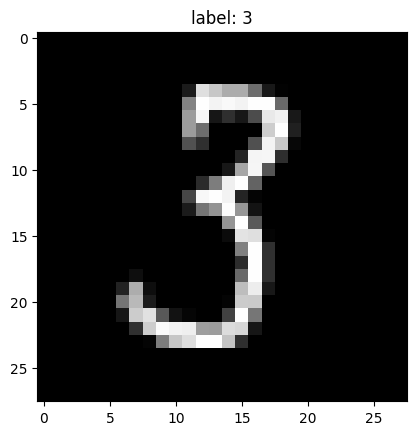

In [ ]:
img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving mlp_weight.npz to mlp_weight (1).npz


{'mlp_weight (1).npz': b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x88duP\xab\x8a\xd8CDZ\x0b\x00\x80@\x0c\x00\x06\x00\x00\x00W1.npy\x9c\x97\xf97\x96\xdf\xd7\x80M\x99\xe72\xa5$e\xd6\x84\xc4s\xf6\x11\x95\x12%\x1a\xd1Dh\xa0\x90\x88O\xa3PHf\x15\x85D\x19\x92\x0cI<\xf7>\xa1T\xa2\x14QR))\xa4\x81F\xa5\xe2\xf5\xfd\x17\xde\xf3\xdb}\xd6^\xeb>k\x9f}\xf6\xbe\xaed\x875\xcb\x1d]\x04\x05\xf6\n\xec\xd7\xf5\xf4\xda\xe3\x11\xa0\xcb\xd3\xd4\x85\xad\xa6\xbaF\x9a\xba[\xfd\x02\x02\x03\xdc}7\xfb\x05xz\xfdo\x7f\xb1\xfb\xce=^c\xfb{\xb6\xbb\xfb{\x8d}\xeb\x19\xcf53\xd2\x9cgn\xaao\xa4yP\xf3\xff\xb5$\xdbo\xd9CI\xfaZ\xce\xcd\xe88\xef\xe3\x02\x86&\x87\xff\xa1\x7f\x9c\x1ah\x06k\xc3\x9e\x94\xdf\x98\xe4`\x853\xdf\x84`\x9a\x9e\x1cm.\xfa\x88\x02}\x071\xa4\xf62h\xee\x14\xa0`\xa2\x8eS\x97\xbd\xc7\x132\xe5p\xe8c#\x1c\xf8|\x06\xa2l\x04\x99h\xd0:\xf4>\xf8\x04\xd6\xea\xfe\x80k~7P\xc7\xa5\x10\x04\xcc>\xf1\'=n\x80U\xda\xf7poA3\x04\xfe\x9c\x05/\xb4Z\xe0is%\xda|\x8f\x03\xcd\xcf\x924?\xaa\x1d~i\xcb\xb3iur\xd4\xae\xba\x10\xda\x8e\x15B\xd4Ci

In [ ]:
weights = np.load('./mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

# 실행
## 올바른 예측: mysum
## 전체 데이터 수 : cnt
## 정확도: (mysum/cnt) * 100

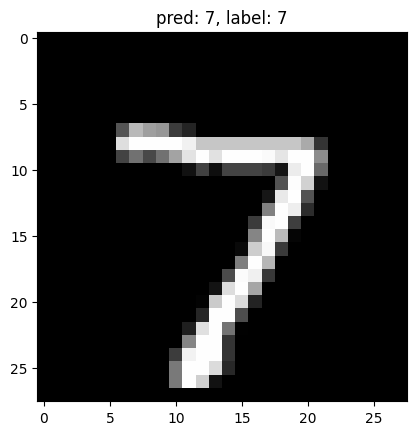

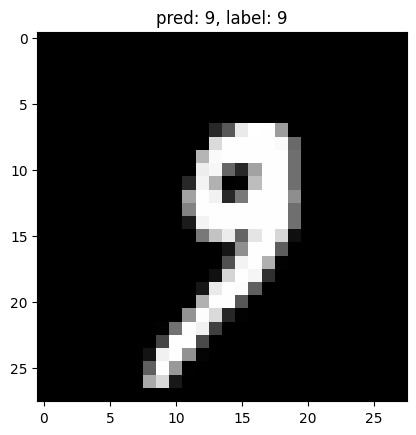

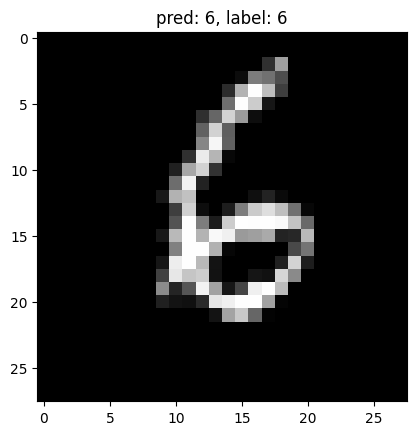

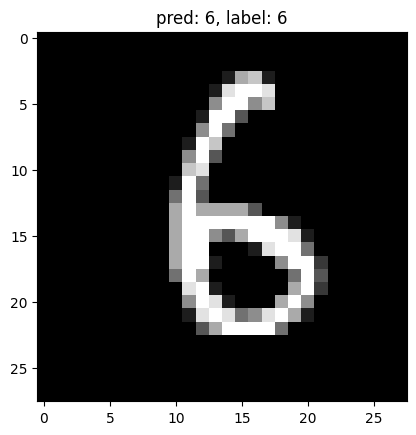

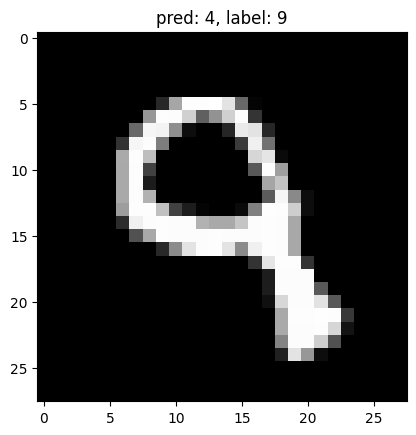

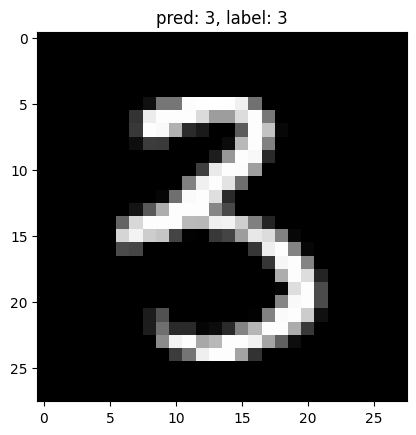

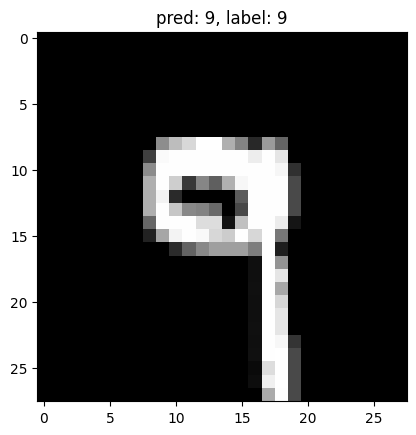

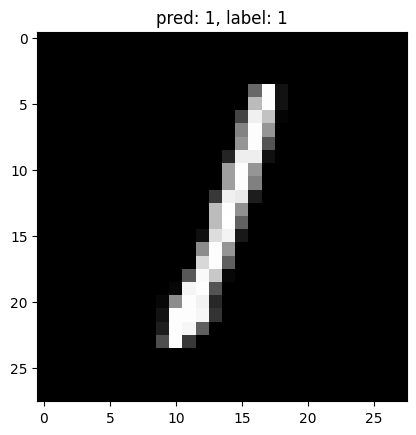

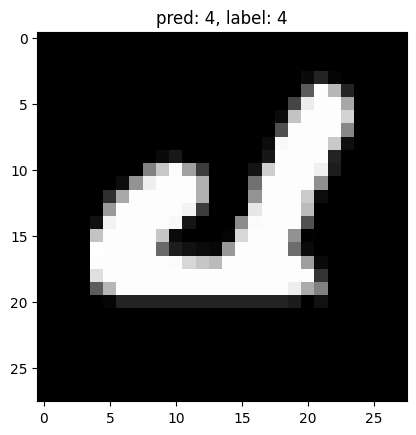

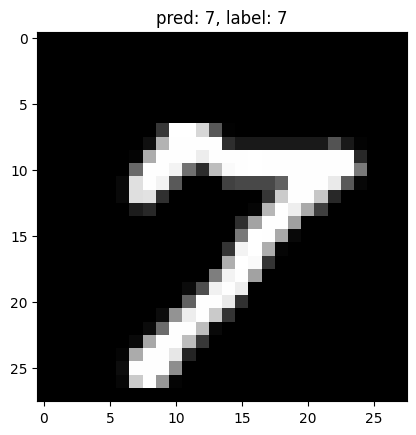

정확도: 91.91


In [ ]:
mysum = 0
cnt = 0
m = len(mnist_test)

for i in range(m):
    image, label = mnist_test.__getitem__(i)
    yhat = model(image)

    if (i%1000==0): # 천번마다 결과를 출력
        img = image.numpy()
        pred_label = np.argmax(yhat)
        plt.title("pred: %d, label: %d" %(pred_label, label))
        plt.imshow(img[0], cmap='gray')
        plt.show()
    cnt += 1
    mysum += (np.argmax(yhat) == label)
print('정확도: %.2f' %((float(mysum)/ cnt) * 100))